In [1]:
from IPython.display import display, HTML
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.metrics
import sklearn

In [2]:
labels_df = pd.read_csv('../stats/all-labels.csv')
display(labels_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake
0,9a22372d22a52397.mp4,1,1.0,1.0,0,1
1,9bc4f1306bb8e2cd.mp4,1,1.0,1.0,0,1
2,88fe2a902a9d8cc7.mp4,1,1.0,1.0,0,1
3,1f3cbda142d0944a.mp4,1,1.0,1.0,0,1
4,63bed62257daccaf.mp4,1,1.0,1.0,0,1
...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0
6939,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0
6940,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0
6941,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0


,filename,label,audio_fake,face_fake,swap_fake,both_fake,median,1st_quartile_pred,3rd_quartile_pred,group_pred
0,9a22372d22a52397.mp4,1,1.0,1.0,0,1,0.999568,0.995638,0.999927,0.999686
1,9bc4f1306bb8e2cd.mp4,1,1.0,1.0,0,1,0.997323,0.962807,0.999860,0.998493
2,88fe2a902a9d8cc7.mp4,1,1.0,1.0,0,1,0.999326,0.997067,0.999958,0.999703
3,1f3cbda142d0944a.mp4,1,1.0,1.0,0,1,0.998871,0.997290,0.999831,0.999158
4,63bed62257daccaf.mp4,1,1.0,1.0,0,1,0.997788,0.975152,0.999854,0.999870
...,...,...,...,...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0,0.237312,0.027877,0.389423,0.351240
6939,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0,0.040162,0.008745,0.163303,0.135718
6940,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0,0.507716,0.392383,0.627312,0.589261
6941,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0,0.005328,0.000529,0.023253,0.009802


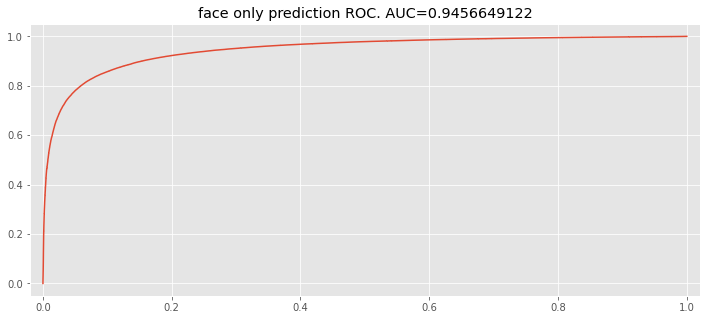

In [9]:
face_path = '../stats/vid-face-preds-211106-0909.csv'
old_face_path = '../stats/face-predictions-211022-1416.csv'
old_face_df = pd.read_csv(old_face_path)
old_face_df = pd.merge(
    left=labels_df, right=old_face_df, 
    left_on='filename', right_on='filename'
)

display(raw_face_df)
old_face_df = old_face_df[
    (old_face_df['face_fake'] == 1) |
    (old_face_df['label'] == 0)
]

f_labels = old_face_df['label']
f_preds = old_face_df['prediction']
fpr, tpr, _ = sklearn.metrics.roc_curve(f_labels, f_preds)
auc = sklearn.metrics.roc_auc_score(f_labels, f_preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("face only prediction ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)

In [5]:
face_path = '../stats/vid-face-preds-211106-0909.csv'
# face_path = '../stats/face-predictions-211022-1416.csv'
raw_face_df = pd.read_csv(face_path)
display(raw_face_df)
# column = '3rd_quartile_pred'
column = 'median'

face_df = raw_face_df[['filename', column]]
face_df = face_df.rename(columns={column: 'face_pred'})
display(face_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake,median,1st_quartile_pred,3rd_quartile_pred,group_pred
0,9a22372d22a52397.mp4,1,1.0,1.0,0,1,0.999568,0.995638,0.999927,0.999686
1,9bc4f1306bb8e2cd.mp4,1,1.0,1.0,0,1,0.997323,0.962807,0.999860,0.998493
2,88fe2a902a9d8cc7.mp4,1,1.0,1.0,0,1,0.999326,0.997067,0.999958,0.999703
3,1f3cbda142d0944a.mp4,1,1.0,1.0,0,1,0.998871,0.997290,0.999831,0.999158
4,63bed62257daccaf.mp4,1,1.0,1.0,0,1,0.997788,0.975152,0.999854,0.999870
...,...,...,...,...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0,0.237312,0.027877,0.389423,0.351240
6939,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0,0.040162,0.008745,0.163303,0.135718
6940,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0,0.507716,0.392383,0.627312,0.589261
6941,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0,0.005328,0.000529,0.023253,0.009802


,filename,face_pred
0,9a22372d22a52397.mp4,0.999568
1,9bc4f1306bb8e2cd.mp4,0.997323
2,88fe2a902a9d8cc7.mp4,0.999326
3,1f3cbda142d0944a.mp4,0.998871
4,63bed62257daccaf.mp4,0.997788
...,...,...
6938,f5c4bfb20068f129.mp4,0.237312
6939,b7b7b7f6db7f6e2e.mp4,0.040162
6940,c3fc75289ae3b41e.mp4,0.507716
6941,519e97d4c90aaa1c.mp4,0.005328


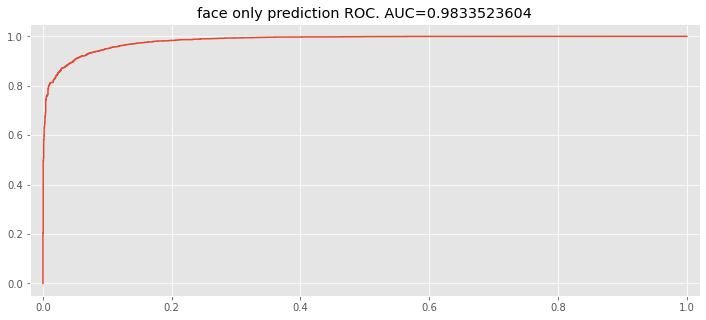

In [6]:
r_face_df = raw_face_df[
    (raw_face_df['face_fake'] == 1) |
    (raw_face_df['label'] == 0)
]
f_labels = r_face_df['label']
f_preds = r_face_df['3rd_quartile_pred']

fpr, tpr, _ = sklearn.metrics.roc_curve(f_labels, f_preds)
auc = sklearn.metrics.roc_auc_score(f_labels, f_preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("face only prediction ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)

In [7]:
raw_face_df

,filename,label,audio_fake,face_fake,swap_fake,both_fake,median,1st_quartile_pred,3rd_quartile_pred,group_pred
0,9a22372d22a52397.mp4,1,1.0,1.0,0,1,0.999568,0.995638,0.999927,0.999686
1,9bc4f1306bb8e2cd.mp4,1,1.0,1.0,0,1,0.997323,0.962807,0.999860,0.998493
2,88fe2a902a9d8cc7.mp4,1,1.0,1.0,0,1,0.999326,0.997067,0.999958,0.999703
3,1f3cbda142d0944a.mp4,1,1.0,1.0,0,1,0.998871,0.997290,0.999831,0.999158
4,63bed62257daccaf.mp4,1,1.0,1.0,0,1,0.997788,0.975152,0.999854,0.999870
...,...,...,...,...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0,0.237312,0.027877,0.389423,0.351240
6939,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0,0.040162,0.008745,0.163303,0.135718
6940,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0,0.507716,0.392383,0.627312,0.589261
6941,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0,0.005328,0.000529,0.023253,0.009802


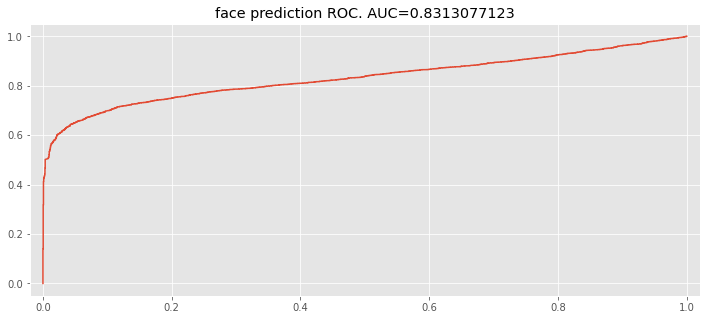

In [8]:
f_labels = raw_face_df['label']
f_preds = raw_face_df['median']

fpr, tpr, _ = sklearn.metrics.roc_curve(f_labels, f_preds)
auc = sklearn.metrics.roc_auc_score(f_labels, f_preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("face prediction ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)